<img src="stroke.jpg" width="450" height="100">

<b> About me: </b> Experienced Data enthusiast here. Currently working for Roche Pharmaceutical firm. <br>
[🔗 LinkedIn](https://www.linkedin.com/in/praveen-sundar-ravi-0bb192182/)

## Table of Contents
[Importing Libraries](#Importing-Libraries) \
[Importing dataset](#Importing-dataset) \
[Data Cleaning](#Data-Cleaning) \
[Feature Engineering:](#Feature-Engineering:) \
   &emsp; &nbsp; [Feature Selection:](#Feature-Selection) \
   &emsp; &nbsp; &emsp; &nbsp; [Method 0 (Eliminating 'ID' type of columns)](#Method-0-(Eliminating-'ID'-type-of-columns)) \
   &emsp; &nbsp; &emsp; &nbsp; [Method 1 (Variance Threshold)](#Method-1-(Variance-Threshold)) \
   &emsp; &nbsp; &emsp; &nbsp; [Method 2 (Chi-square)](#Method-2-(Chi-square)) \
   &emsp; &nbsp; &emsp; &nbsp; [Method 3 (Mutual Information)](#Method-3-(Mutual-Information)) \
   &emsp; &nbsp; &emsp; &nbsp; [Method 4 (Correlation matrix)](#Method-4-(Correlation-matrix)) \
   &emsp; &nbsp; [Feature Encoding:](#Feature-Encoding) \
   &emsp; &nbsp; &emsp; &nbsp; [One Hot Encoding](#One-Hot-Encoding) \
   &emsp; &nbsp; &emsp; &nbsp; [One Hot labeling](#One-Hot-labeling) \
   &emsp; &nbsp; [Feature Scaling:](#Feature-Scaling) \
   &emsp; &nbsp; &emsp; &nbsp; [Normalisation(min-max) scaling](#Normalisation(min-max)-scaling) \
   &emsp; &nbsp; &emsp; &nbsp; [Normalisation(MaxAbsScaler) scaling](#Normalisation(MaxAbsScaler)-scaling) \
   &emsp; &nbsp; &emsp; &nbsp; [Normalisation(RobustScaler) scaling](#Normalisation(RobustScaler)-scaling) \
   &emsp; &nbsp; &emsp; &nbsp; [Standardisation(Z-score Normalisation) scaling](#Standardisation(Z-score-Normalisation)-scaling) \
   &emsp; &nbsp; [Data & target featuring](#Data-&-target-featuring) \
   &emsp; &nbsp; [Balancing Data:](#Balancing-Data) \
   &emsp; &nbsp; &emsp; &nbsp; [Under Sampling](#Under-Sampling) \
   &emsp; &nbsp; &emsp; &nbsp; [Over Sampling](#Over-Sampling) \
   &emsp; &nbsp; &emsp; &nbsp; [Over-Under Sampling](#Over-Under-Sampling) \
[Test train split](#Test-train-split) \
[Machine Learning Modeling:](#Machine-Learning-Modeling) \
   &emsp; &nbsp; [Support Vector Machine (SVM) model](#Support-Vector-Machine-(SVM)-model) \
   &emsp; &nbsp; [Logistic Regression model](#Logistic-Regression-model) \
   &emsp; &nbsp; [Decision tree model](#Decision-tree-model) \
   &emsp; &nbsp; [Random Forest model](#Random-Forest-model) \
[Predicted v/s Actual value dataset](#Predicted-v/s-Actual-value-dataset) \
[CONCLUSION](#CONCLUSION) 

## Importing Libraries

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from collections import Counter
from numpy import where, mean
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [34]:
def import_library(lib_name):
    try:
        # Attempt to import the library
        _import_(lib_name)
    except ImportError:
        # If ImportError is raised, the library is not already imported
        print(f"{lib_name} is not imported. Importing now...")
        importlib.import_module(lib_name)
    else:
        print(f"{lib_name} is already imported.")

<div class="alert alert-block alert-info">
<b> Problem Statement: Predicting the stroke using the given parameters such as age, gender, bmi etc. </b>
</div>

## Importing dataset

In [228]:
df = pd.read_csv(r'healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


## Data Cleaning

In [229]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<div class="alert alert-block alert-warning">  
<b> Here we're having some NA values for numerical feature 'bmi'. We should eliminate this before moving further ahead. </b>  
</div>

In [230]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [231]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Feature Engineering:

### Feature Selection

#### Method 0 (Eliminating 'ID' type of columns)

In [232]:

df_cfs_le = df.drop(columns=['id'])
df = df_cfs_le


In [217]:

column_names = df.columns.to_list()
print('column_names: ', column_names)

df_obj = df.select_dtypes(include=object)
column_names_obj = df_obj.columns.to_list()
print('column_names_obj: ',column_names_obj)

df_obj = df.select_dtypes(exclude=object)
column_names_num = df_obj.columns.to_list()
print('column_names_num: ',column_names_num)


column_names:  ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
column_names_obj:  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
column_names_num:  ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [218]:
df_cfs_le, column_names_new = onehotlabeling(df)
print(column_names_new)
print(df_cfs_le)

['smoking_status_1_1', 'smoking_status_1_1', 'smoking_status_1_1', 'smoking_status_1_1', 'smoking_status_1_1']
      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0      

#### Method 1 (Variance Threshold)

In [219]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)

data = df_cfs_le

var_thres.fit(data)

print(data.columns[var_thres.get_support()])

constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]

print('\nconstant_columns: ',constant_columns)

data.drop(constant_columns,axis=1)

df_cfs_le = data


df_cfs_le

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

constant_columns:  []


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


<div class="alert alert-block alert-success">  
<b> Findings: </b> Method 1 of feature selection tells us that we don't have any zero or less variance features which is why
'constant_columns' becomes null.   
</div>

<div class="alert alert-block alert-warning">  
<b> Run the below scaling part only if needed </b>  
</div>

In [172]:
# scaling the data
from sklearn.preprocessing import MaxAbsScaler
scaling = MaxAbsScaler()
df_cfs_le = scaling_process(df_cfs_le)

In [173]:
# Creating data & target sets
X = df_cfs_le.drop(columns=['stroke'])
y = df_cfs_le['stroke']


#### Method 2 (Chi-square)

In [174]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns
print(featureScores.sort_values(by=['Score'], ascending=False))

            features      Score
2      heart_disease  87.987436
1       hypertension  75.449498
7                age  44.332036
3       ever_married  20.622787
8  avg_glucose_level   6.323270
6     smoking_status   3.369423
4          work_type   2.925901
5     Residence_type   0.600717
0             gender   0.239001
9                bmi   0.140199


#### Method 3 (Mutual Information)

In [175]:
# Test Train Split step
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [176]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
print(mutual_info.sort_values(ascending=False))

age                  0.038184
heart_disease        0.012547
bmi                  0.011702
ever_married         0.009603
work_type            0.007408
Residence_type       0.006561
avg_glucose_level    0.005869
smoking_status       0.004526
hypertension         0.004281
gender               0.000000
dtype: float64


In [177]:
from sklearn.feature_selection import SelectKBest

#Now we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
selected_features = X_train.columns[sel_five_cols.get_support()].tolist()
selected_features

['hypertension', 'ever_married', 'age', 'avg_glucose_level', 'bmi']

#### Method 4 (Correlation matrix)

<Axes: >

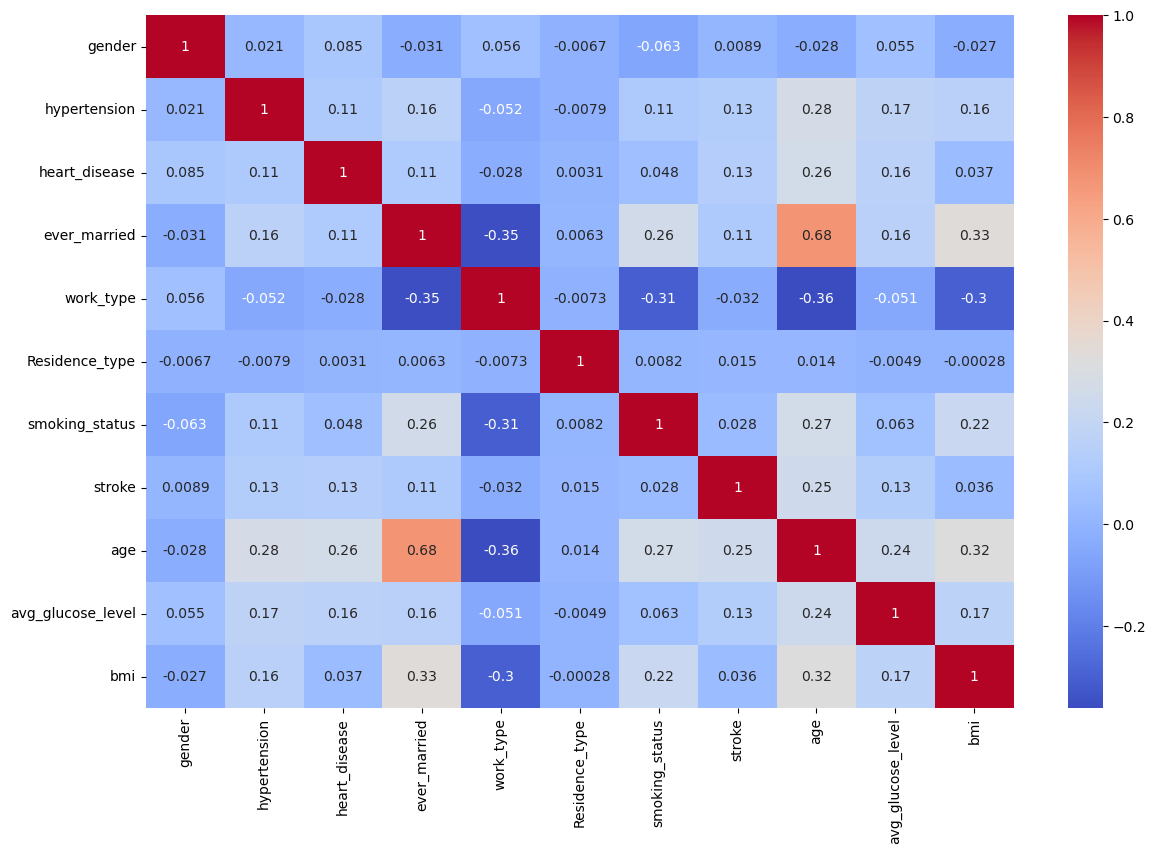

In [162]:
# display correlation matrix in heatmap
corr = df_cfs_le.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<div class="alert alert-block alert-success">  
<b> Feature selection summary: <br> </b> 
    (i) From Method 3 & 4, we can found that the features like age, hypertension, heart_disease, bmi and      avg_glucose_level are highly correlated with stroke. <br>
   (ii) Also we can subset the categorical features alone and then do a chi square test if we want to know their relationship with target feature. I left it aside for the time being :-) <br>
  (iii) Since this dataset (5110 rows x 12 cols) is relatively small, I've selected all the features to apply various models in the later part.  
</div>

<div class="alert alert-block alert-warning">  
<b> You can use any one of the below encoding methods. Personally I'm gonna go with One Hot Encoding </b>  
</div>

### Feature Encoding

In [233]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### One Hot Encoding

In [234]:
# One Hot Encoding function to encode all categorical string columns 

df_pass = df

def onehotencoding(dataframe_name):
    ohe = OneHotEncoder(drop='first',handle_unknown='ignore')
    df_N=dataframe_name
    for i in column_names_obj:
        feature_cols = ohe.fit_transform(dataframe_name[[i]]).toarray()
        feature_cols_names = np.array(ohe.categories_).ravel()
        feature_cols_names = feature_cols_names[1:]
        feature = pd.DataFrame(feature_cols,columns=feature_cols_names)
        df_N = pd.concat([df_N,feature],axis=1)
    return df_N

#Pass your dataset here ⬇️
df_enc = onehotencoding(df_pass)

#dropping categorical columns
df_enc = df_enc.drop(column_names_obj, axis=1)
print(df_enc)

#getting column names of new df
column_names = df_enc.columns.to_list()
print(column_names)

       age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0     67.0             0              1             228.69  36.6       1   
1     61.0             0              0             202.21  28.1       1   
2     80.0             0              1             105.92  32.5       1   
3     49.0             0              0             171.23  34.4       1   
4     79.0             1              0             174.12  24.0       1   
...    ...           ...            ...                ...   ...     ...   
5105  80.0             1              0              83.75  28.1       0   
5106  81.0             0              0             125.20  40.0       0   
5107  35.0             0              0              82.99  30.6       0   
5108  51.0             0              0             166.29  25.6       0   
5109  44.0             0              0              85.28  26.2       0   

      Male  Other  Yes  Never_worked  Private  Self-employed  children  Urban  \
0     

#### One Hot labeling

In [216]:
# One Hot labeling function to encode all categorical columns 

df_le = df

def onehotlabeling(dataframe_name):
    le = LabelEncoder()
    df_N=dataframe_name
    column_names_new = []
    for col in column_names_obj:
        n=i+'_1'
        column_names_new.append(n)
        df_N[col] = le.fit_transform(df_N[col])
    return df_N, column_names_new


In [ ]:
#Pass your dataset here ⬇️
df_le_N = onehotlabeling(df_le)

#dropping categorical columns
df_le_N = df_le_N.drop(column_names, axis=1)
print(df_le_N)

#getting column names of new df
column_names = df_le_N.columns.to_list()
print(column_names)

### Feature Scaling

In [235]:
def scaling_process(dataframe):

    df_scaling = dataframe

    scaled_features = scaling.fit_transform(df_scaling[['age','avg_glucose_level','bmi']])

    scaled_features_names = scaling.feature_names_in_.tolist()
    scaled_features_df = pd.DataFrame(scaled_features,columns=scaled_features_names)
    df_scaled = df_scaling.drop(columns=scaled_features_names)
    df_enc = pd.concat([df_scaled,scaled_features_df], axis=1)

    return df_enc

<div class="alert alert-block alert-warning">  
<b> You can chose any one of below feature scaling methods either standardisation or normalisation.
        I've used standardisation(Z-score) </b>  
</div>

#### Normalisation(min-max) scaling

In [122]:
# We more likely to use this scaling method if we apply CNN model or image recognition (0-255).
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
df_enc = scaling_process(df_enc)
df_enc

,hypertension,heart_disease,stroke,Male,Other,Yes,Never_worked,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes,age,avg_glucose_level,bmi
0,0,1,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.816895,0.801265,0.301260
1,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.743652,0.679023,0.203895
2,0,1,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.975586,0.234512,0.254296
3,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.597168,0.536008,0.276060
4,1,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.963379,0.549349,0.156930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.975586,0.132167,0.203895
5106,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.987793,0.323516,0.340206
5107,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.426270,0.128658,0.232532
5108,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.621582,0.513203,0.175258


#### Normalisation(MaxAbsScaler) scaling

In [76]:
from sklearn.preprocessing import MaxAbsScaler
scaling = MaxAbsScaler()
df_enc = scaling_process(df_enc)
df_enc

,hypertension,heart_disease,stroke,Male,Other,Yes,Never_worked,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes,age,avg_glucose_level,bmi
0,0,1,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.817073,0.841577,0.375000
1,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.743902,0.744130,0.287910
2,0,1,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.975610,0.389784,0.332992
3,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.597561,0.630124,0.352459
4,1,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.963415,0.640760,0.245902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.975610,0.308199,0.287910
5106,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.987805,0.460735,0.409836
5107,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.426829,0.305402,0.313525
5108,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.621951,0.611945,0.262295


#### Normalisation(RobustScaler) scaling

In [78]:
# Try this scaling if our dataset has lot of outliers
from sklearn.preprocessing import RobustScaler
scaling = RobustScaler()
df_enc = scaling_process(df_enc)
df_enc

,hypertension,heart_disease,stroke,Male,Other,Yes,Never_worked,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes,age,avg_glucose_level,bmi
0,0,1,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.611111,3.712987,0.944444
1,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.444444,2.994300,0.000000
2,0,1,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.972222,0.380920,0.488889
3,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.111111,2.153481,0.700000
4,1,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.944444,2.231917,-0.455556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.972222,-0.220790,0.000000
5106,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.904193,1.322222
5107,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.277778,-0.241417,0.277778
5108,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.166667,2.019406,-0.277778


#### Standardisation(Z-score Normalisation) scaling

In [236]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
df_enc = scaling_process(df_enc)
df_enc

,hypertension,heart_disease,stroke,Male,Other,Yes,Never_worked,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes,age,avg_glucose_level,bmi
0,0,1,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.051434,2.706375,1.005086
1,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.786070,2.121559,-0.098981
2,0,1,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.626390,-0.005028,0.472536
3,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.255342,1.437358,0.719327
4,1,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.582163,1.501184,-0.631531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.626390,-0.494658,-0.098981
5106,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.670617,0.420775,1.446713
5107,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.363842,-0.511443,0.225745
5108,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.343796,1.328257,-0.423706


### Data & target featuring

<div class="alert alert-block alert-warning">  
<b> Just run one of the below set of train test split codes,
    correspoding to the type of feature engineering you choosed </b>  
</div>

In [243]:
# X, y from hot encoding
X = df_enc.drop('stroke',axis=1)
y = df_enc['stroke']

In [ ]:
# X, y from hot labeling
X = df_le_N.drop('stroke',axis=1)
y = df_le_N['stroke']

<div class="alert alert-block alert-warning">  
<b> You can use any one of below sampling methods. I'm going to use over-sampling technique 2 which 
    gives > accuracy compared to other methods </b>  
</div>

### Balancing Data

#### Under Sampling

<div class="alert alert-block alert-warning">  
<b> Please run the below code only if you face 'imblearn' module not found issue. </b>  
</div>

In [ ]:
conda install -c conda-forge imbalanced-learn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, y)

# QC
# We used One Hot encoding output here⬇.
print('# of 0: ',df_enc.stroke[df_enc.stroke==0].count())
print('# of 1: ',df_enc.stroke[df_enc.stroke==1].count())

print('# of 0 after under sampling: ', y_res.loc[y_res==0].count())

X, y = X_res, y_res

In [ ]:
#To find column name of a Series
y_res.name

#### Over Sampling

In [240]:
#Technique 1
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_res, y_res = smk.fit_resample(X, y)

# QC
# We used One Hot encoding output here⬇.
print('# of 0: ',df_enc.stroke[df_enc.stroke==0].count())
print('# of 1: ',df_enc.stroke[df_enc.stroke==1].count())

print('# of 0 after under sampling: ', y_res.loc[y_res==0].count())

X, y = X_res, y_res

# of 0:  4861
# of 1:  249
# of 0 after under sampling:  4844


In [244]:
#Technique 2
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(sampling_strategy=1)
X_res, y_res = over_sampler.fit_resample(X, y)

# QC
# We used One Hot encoding output here⬇.
print('# of 0: ',df_enc.stroke[df_enc.stroke==0].count())
print('# of 1: ',df_enc.stroke[df_enc.stroke==1].count())

print('# of 0 after under sampling: ', y_res.loc[y_res==0].count())

X, y = X_res, y_res

# of 0:  4861
# of 1:  249
# of 0 after under sampling:  4861


#### Over-Under Sampling

In [ ]:
os_us = SMOTETomek(sampling_strategy=0.5)
X_res, y_res = os_us.fit_resample(X, y)

# QC
# We used One Hot encoding output here⬇.
print('# of 0: ',df_enc.stroke[df_enc.stroke==0].count())
print('# of 1: ',df_enc.stroke[df_enc.stroke==1].count())

print('# of 0 after under sampling: ', y_res.loc[y_res==0].count())

X, y = X_res, y_res

### Test train split

In [245]:
# Test Train Split step
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

<div class="alert alert-block alert-warning">  
<b> Note: </b> Since we are having classification problem statement, we'll be neglecting Linear Regression
          and gonna go with other models
</div>

## Machine Learning Modeling

### Support Vector Machine (SVM) model

In [246]:
# weights = {0:900, 1:100}
# model = SVC(class_weight='balanced')

from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)


SVC()

In [ ]:
# When we use different gamma values
gamma_val = ['auto', 'scale', 50, 100, 1000]
for i in gamma_val:
    model = SVC(kernel = 'rbf', gamma=i)
    model.fit(X_train,y_train)
    print('Using {} as gamma, accuracy score = {}'.format(i,model.score(X_test,y_test)))

In [ ]:
# When we use different regularisation C values
regularisation_val = [50, 100, 1000]
for i in regularisation_val:
    model = SVC(kernel = 'rbf', C=i)
    model.fit(X_train,y_train)
    print('Using {} as C, accuracy score = {}'.format(i,model.score(X_test,y_test)))

In [ ]:
# Trying to see kernel impact on model:
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
# Note: For 'precomputed' kernel we need square matrix
for i in kernel_values:
    model = SVC(kernel=i)
    model.fit(X_train,y_train)
    print('Using {} as kernel, accuracy score = {}'.format(i,model.score(X_test,y_test)))

<div class="alert alert-block alert-success">  
<b> Summary: <br> </b> 
   <b>   When we use dataset after performing one hot encoding feature engineering: <br> </b> 
        Using linear as kernel, accuracy score = 0.9432485322896281 <br>
        Using poly as kernel, accuracy score = 0.9432485322896281 <br>
        Using rbf as kernel, accuracy score = 0.9432485322896281 <br>
        Using sigmoid as kernel, accuracy score = 0.9432485322896281 <br>
    <b>  When we use dataset after performing hot labeling feature engineering: <br> </b> 
        Using linear as kernel, accuracy score = 0.9540117416829745 <br>
        Using poly as kernel, accuracy score = 0.9540117416829745 <br>
        Using rbf as kernel, accuracy score = 0.9540117416829745 <br>
        Using sigmoid as kernel, accuracy score = 0.9540117416829745 <br>
</div>

<div class="alert alert-block alert-success">  
<b> Outcome: </b>  Changing kernel or gamma or C values doesn't affect the model accuracy in our case
</div>

In [247]:
print('Support Vector Machine (SVM) model accuracy: {}%'.format(round((model.score(X_test,y_test))*100,2)))

Support Vector Machine (SVM) model accuracy: 82.83%


### Logistic Regression model

In [248]:
model_LR = linear_model.LogisticRegression(max_iter=1000)
model_LR.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

<div class="alert alert-block alert-warning">  
<b> Note: </b> I was getting this error "STOP: TOTAL NO. of ITERATIONS REACHED LIMIT"
    So I used changed max_iter value from 100(default) to 1000
</div>

In [249]:
print('Linear Regression model accuracy: {}%'.format(round((model_LR.score(X_test,y_test))*100,2)))

Linear Regression model accuracy: 75.73%


Logistic regression model accuracy before scaling: 73% \
Logistic regression model accuracy after scaling: 75%

In [ ]:
model = linear_model.LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

### Decision tree model

In [251]:
#DT model with weight distribution
# weights = {1:250, 0:4960}
# model_DT = tree.DecisionTreeClassifier(class_weight='balanced')
# model_DT.fit(X_train,y_train)

#DT model without weight distribution as we already done under or over sampling before this
model_DT = tree.DecisionTreeClassifier()
model_DT.fit(X_train,y_train)

DecisionTreeClassifier()

<div class="alert alert-block alert-warning">  
<b> Note: </b> Since in our dataset we're having more number of 0's than 1 for stroke flag feature, 
         which will make our data imbalanced. Hence I've used appropriate or by trial weights in the Decision Tree
         model
</div>

In [252]:
print('Decision Tree model accuracy: {}%'.format(round((model_DT.score(X_test,y_test))*100,2)))

Decision Tree model accuracy: 97.48%


In [ ]:
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

<div class="alert alert-block alert-success">  
<b> Observations: </b> <br>
            (i)  When I balanced the DT model using class_weight hyperparameter, I got 90+ % accuracy but 
                 there's huge difference between predicted vs actual stroke values <br>
            (ii) When I performed under balancing technique before running the model, I got 70+ % accuracy but 
                 difference between predicted vs actual stroke values was very less <br>
</div>

### Random Forest model

In [253]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=20)
""" n_estimators --> This's the no. of times the model gonna create different sest of random data and give us
                     mean of all the outcomes. """
model_RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [254]:
print('Random Forest model accuracy: {}%'.format(round((model_RF.score(X_test,y_test))*100,2)))

Random Forest model accuracy: 98.82%


In [ ]:
model = RandomForestClassifier(n_estimators=20)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

#### Predicted v/s Actual value dataset

In [ ]:
# Getting the predicted values
predicted_stroke=model_RF.predict(X_test)

Prediction_comparison_RF = X_test

#Adding predicted & actual stroke values to X_test table
Prediction_comparison_RF['actual_stroke_value'] = y_test.tolist()
Prediction_comparison_RF['predicted_stroke'] = predicted_stroke.tolist()
print(Prediction_comparison_RF.head(100))

#Exporting the test dataset which contains predicted & actual stroke values to csv
Prediction_comparison_RF.to_csv(r'Prediction_comparison_RF.csv',mode='w+')

## CONCLUSION

<div class="alert alert-block alert-success">  
    (i)  Among all the models, Random Forest model gives the maximum accuracy <b> 95% </b> in our case. <br>
    (ii)  Feature engineering techniques like scaling, feature encoding does improves the model accuracy. <br>
   (iii)  I've not included much visualisations in this workbook. I Will incorporate them later for much easier  understanding which every stakeholder wants:-) 
</div>

In [ ]:
                                            
                                              " Happy Learning!🙂 "
        